In [1]:
'''
IMPORTING THE GOOD STUFF
'''
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab as pl
import numpy as np
import pandas as pd
import pymysql as mdb
from sqlalchemy import create_engine
import seaborn as sns

np.random.seed(sum(map(ord, "aesthetics")))

In [2]:
'''
define useful functions
'''

def accuracy(y_true,y_pred):
    # NumPy interprets True and False as 1. and 0.
    return np.mean(y_true == y_pred)

def initialClean(df):
    '''
    returns a new df with NA values dropped
    '''
    print 'Current length:'
    print len(df)
    df = df.dropna(axis=0)
    print 'Length after drop NA'
    print len(df)
    return df

def userCount(df):
    '''
    Based on the data left, how many user vectors do we have?
    only prints the values for the user to assess
    '''
    x = np.unique(features['user_id'].values.ravel())
    userCount = len(x)
    print 'How many users are there?'
    print userCount

def howMany(df):
    '''
    enables iteration through each user
    '''
    x = np.unique(df['user_id'].values.ravel())
    return x
    
def churnStatus(df):
    '''
    determines if a user has churned
    returns a new df
    with an additional churned column that is True or False
    '''
    # client defines churn status by inactivity for more than 30 days
    import datetime as dt
    today = dt.datetime.now()
    churn_date = dt.datetime.now() + dt.timedelta(-30)

    # determine if each user in the set is churned or not, boolean column holds the answer
    df['timeSince'] = today - df['last_seen_at']
    churn = dt.timedelta(days=30)
    s = pd.Series(df['timeSince'] > churn)
    df['churned'] = s
    deltat = today - df['last_seen_at']
    days = []
    for value in deltat:
        days.append(value.days)
    df['daysSince'] = days
    
    # print a report
    df2 = df
    df2 = df2.drop_duplicates('user_id')
    print df2['churned'].value_counts()    
    
    return df

In [32]:
'''
RETRIEVE SERVER INFORMATION
'''
   
authen = pd.read_csv('weave_sqlserver.login')

insight
2xMhnE458gSPxeS
0    insight
Name: user, dtype: object


In [ ]:
print 'Starting MySQL Query...'
'''
ESTABLISHING A LINE OF COMMUNICATION WITH MYSQL DB

ISSUE: AVOID BIAS BY RANDOM USER SAMPLING RATHER THAN TIME SAMPLING
'''

db = mdb.connect(user=authen.ix[0][0], password=authen.ix[0][1], host="weave-prod-analytics.cbyff1yl1xje.us-west-2.rds.amazonaws.com", db="weave_prod", charset='utf8')
sql = "SELECT user_id, action, user_activities.created_at, signed_up_at, last_seen_at, pushed_friends, response_rate, first_name, last_name, profile_url FROM user_activities JOIN users ON user_id = users.id WHERE user_id IS NOT NULL AND action IS NOT NULL AND user_activities.created_at > '2015-02-01' AND region IN ('Greater New York City Area','San Francisco Bay Area') ORDER BY user_id ASC;"
cur = db.cursor()
data = pd.read_sql(sql, db) # just NYC and SF
print "Putting the all the data (Feb 2015 - current day) into the 'data' df"

In [4]:
print 'Starting MySQL Query...'
'''
PULL DOWN CONVO DATA
'''

db = mdb.connect(user=authen.ix[0][0], password=authen.ix[0][1], host="weave-prod-analytics.cbyff1yl1xje.us-west-2.rds.amazonaws.com", db="weave_prod", charset='utf8')
sql = "SELECT user_id, match_id, user_chat_at, convo_at, convos.created_at, region FROM convos JOIN users ON (user_id=users.id) WHERE region IN ('Greater New York City Area','San Francisco Bay Area') AND convo_at > '2015-02-01' ORDER BY user_id ASC;"
cur = db.cursor()
convo_data = pd.read_sql(sql, db) # just NYC and SF
print "Putting the all the data (Feb 2015 - current day) into the 'convo_data' df"

Starting MySQL Query...
Putting the all the data (Feb 2015 - current day) into the 'data' df


In [5]:
print 'Starting MySQL Query...'
'''
PULL DOWN MATCH DATA
'''

db = mdb.connect(user=authen.ix[0][0], password=authen.ix[0][1], host="weave-prod-analytics.cbyff1yl1xje.us-west-2.rds.amazonaws.com", db="weave_prod", charset='utf8')
sql = "SELECT user_id, user_yes_at, matched_at, user_matches.created_at, region FROM user_matches JOIN users ON (user_id=users.id) WHERE region IN ('Greater New York City Area', 'San Francisco Bay Area') AND matched_at > '2015-02-01' ORDER BY user_id ASC;"
cur = db.cursor()
match_data = pd.read_sql(sql, db) # just NYC and SF
print "Putting the all the data (Feb 2015 - current day) into the 'match_data' df"

Starting MySQL Query...
Putting the all the data (Feb 2015 - current day) into the 'match_data' df


In [6]:
features = initialClean(data)

Current length:
588321
Length after drop NA
426668


In [7]:
'''
FIRST: CALCULATE CHURN STATUS

'''
# client defines churn status by inactivity for more than 30 days
import datetime as dt
today = dt.datetime.now()
churn_date = dt.datetime.now() + dt.timedelta(-30)

# determine if each user in the set is churned or not, boolean column holds the answer
features['timeSince'] = today - data['last_seen_at']
churn = dt.timedelta(days=30)
s = pd.Series(features['timeSince'] > churn)
features['churned'] = s
deltat = today - features['last_seen_at']
days = []
for value in deltat:
    days.append(value.days)
features['daysSince'] = days
#features['secsSince'] = days * 86400
print 'Finished!'

/Users/kmflynn5/Documents/insight/app/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kmflynn5/Documents/insight/app/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Finished!


/Users/kmflynn5/Documents/insight/app/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
'''
FOCUS ON LAST 30 DAYS OF USER ACTIVITY
'''

features['weekStart'] = features['last_seen_at'] + dt.timedelta(-30)

pieces = []
lastWeekCount = []
lwChurn = []
lwActive = []
userLWdict = {}
hw = howMany(features)
for user in hw:
    df = features[features['user_id'] == user]
    df = df.reset_index() # index values vary by user so the following line won't work unless it is reset
    churnStatus = df['churned'].loc[0]
    df = df[df['created_at'] > df['weekStart'].loc[0]]
    pieces.append(df)
    weeklyCount = len(df)
    lastWeekCount.append(weeklyCount)
    if churnStatus: lwChurn.append(weeklyCount)
    else: lwActive.append(weeklyCount)
    userLWdict[user] = weeklyCount

#merge user actions over the past X days into a single df

lwdf = pd.concat(pieces)
lwdf = lwdf.reset_index()
to_drop = ['index', 'level_0']
lwdf = lwdf.drop(to_drop,axis=1)

'''
CREATE THE TARGET ARRAY TO TRAIN YOUR MODEL 
'''

churnDict = {}
hw = howMany(lwdf)
for user in hw:
    df = lwdf[lwdf['user_id'] == user]
    df = df.drop_duplicates('user_id')
    x = np.array(df['churned'])
    y = np.array_str(x)
    y = y[1:-1]
    if y == 'False': churnDict[user] = 0
    else: churnDict[user] = 1
        
'''
CALCULATE RETENTION RATE?

defined as the number of days in 30 days a user returns to the app

data is stored in userRetention dict
'''
userRetention = {}
activeRet = []
churnRet = []

for user in hw:
    df = lwdf[lwdf['user_id'] == user]
    day_list = [t.day for t in df['created_at']]
    retRate = float(len(list(set(day_list))))/10.0
    #print 'User: %s' % user
    #print 'retention rate is %s' % retRate
    userRetention[user] = retRate
    df = df.reset_index() # index values vary by user so the following line won't work unless it is reset
    try:
        churnStatus = df['churned'].loc[0]
        pass

    except KeyError:
        churnStatus = True
        pass
    
    if churnStatus: churnRet.append(retRate)
    else: activeRet.append(retRate)

'''
PLACE ALL USER ACTIONS INTO A DICT
'''

dict = {}
for user in hw:
    df = lwdf[lwdf['user_id'] == user]
    userActions = df['action'].value_counts().sort_index()
    dict[user] = userActions

'''
Convert DICT actions into DF
'''
# Add target and other features (retention rate)
completeDict = {}
for user in hw:
    s = dict[user]
    s['target'] = churnDict[user]
    s['retRate'] = userRetention[user] # may want to remove this...
    completeDict[user] = s

# create the DF    
stuff = pd.DataFrame(completeDict)
featureSpace = stuff.transpose()
stuff.fillna(0, inplace=True)

/Users/kmflynn5/Documents/insight/app/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KeyboardInterrupt: 

In [335]:
'''
LETS KEEP CERTAIN COLUMNS FOR ENGINEERING
'''

keep = [u'retRate', u'main_card_swiped_left', u'main_card_swiped_right', u'main_match_dialog_keep_going_clicked', u'main_match_dialog_send_message_clicked', u'push_registration']
eng = featureSpace[keep]

#retRate dummy variables
eng['retRate_low'] = ((eng['retRate'] < 0.33) * 1)
eng['retRate_hi'] = ((eng['retRate'] > 0.66) * 1)

# how often does a user swipe left versus right?
eng['swipe_left_weight'] = eng['main_card_swiped_left'] / (eng['main_card_swiped_left'] + eng['main_card_swiped_right'])
eng['onlyLeft'] = ((eng['swipe_left_weight'] == 1) * 1)
eng['swipeLeft_low'] = ((eng['swipe_left_weight'] < 0.33) * 1)
eng['swipeLeft_hi'] = ((eng['swipe_left_weight'] > 0.66) * 1)

# add in response_rate from lwdf...
lwdf_nodups = lwdf.drop_duplicates('user_id')
lwdf_nodups = lwdf_nodups.set_index('user_id')
eng['response_rate'] = pd.Series(lwdf_nodups['response_rate'])
eng['response_rate_hi'] = ((eng['response_rate'] > 0.66) * 1)
eng['response_rate_low'] = ((eng['response_rate'] < 0.33) * 1)
# 

keep2 = ['main_match_dialog_keep_going_clicked', 'push_registration', 'response_rate_hi', 'response_rate_low', 'swipeLeft_hi', 'swipeLeft_low', 'onlyLeft', 'retRate_hi', 'retRate_low']
eng_adj = eng[keep2]

/Users/kmflynn5/Documents/insight/app/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kmflynn5/Documents/insight/app/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kmflynn5/Documents/insight/app/env/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [336]:
'''
CONVO/MATCH FEATURE ENGINEERING
'''
import datetime as dt
today = dt.datetime.now()

convo_data['delta_convo_start'] = convo_data['user_chat_at'] - convo_data['convo_at']
convo_data['convo_init'] = (convo_data['delta_convo_start'] == 0)
convo_data['convo_init_true'] = (convo_data['convo_init'] * 1)

match_data['delta_match_start'] = match_data['user_yes_at'] - match_data['matched_at']
match_data['match_init'] = (match_data['delta_match_start'] == 0)
match_data['match_init_true'] = (match_data['match_init'] * 1)

convoNum = {}
convoInit = {}
convoRatio = {}
lastConvo = {}
hw = howMany(convo_data)
for user in hw:
    # convo counts
    df = convo_data[convo_data['user_id'] == user]
    init_count = np.sum(df['convo_init_true'])
    convo_count = np.count_nonzero(df['convo_at'])
    convo_ratio = (float(init_count)/(float(init_count)+float(convo_count)))
    convoInit[user] = init_count
    convoNum[user] = convo_count
    convoRatio[user] = convo_ratio
    
    #days since last convo
    df = df.sort(['convo_at'], ascending=False)
    df = df.drop_duplicates('user_id')
    df = df.reset_index()
    lastConvo[user] = (today - df['convo_at'].loc[0]).days

matchNum = {}
matchInit = {}
matchRatio = {}
lastMatch = {}
hw = howMany(match_data)
for user in hw:
    #match counts
    df2 = match_data[match_data['user_id'] == user]
    match_count = np.count_nonzero(df2['matched_at'])
    match_init_count = np.sum(df2['match_init_true'])
    matchInit[user] = match_init_count
    matchNum[user] = match_count
    match_ratio = (float(match_init_count)/(float(match_init_count)+float(match_count)))
    matchRatio[user] = match_ratio
        
    #days since last match
    df2 = df2.sort(['matched_at'], ascending=False)
    df2 = df2.drop_duplicates('user_id')
    df2 = df2.reset_index()
    lastMatch[user] = (today - df2['matched_at'].loc[0]).days   
    
print 'Finished!'

Finished!


In [391]:
# create the DF    
lm = pd.DataFrame(lastMatch.items(), columns = ['user_id', 'daysSinceMatch'])
lm = lm.set_index(['user_id'])
lc = pd.DataFrame(lastConvo.items(), columns = ['user_id', 'daysSinceConvo'])
lc = lc.set_index(['user_id'])
mn = pd.DataFrame(matchNum.items(), columns = ['user_id', 'matchCount'])
mn = mn.set_index(['user_id'])
mi = pd.DataFrame(matchInit.items(), columns = ['user_id', 'matchInitCount'])
mi = mi.set_index(['user_id'])
mr = pd.DataFrame(matchRatio.items(), columns = ['user_id', 'matchRate'])
mr = mr.set_index(['user_id'])
cn = pd.DataFrame(convoNum.items(), columns = ['user_id', 'convoCount'])
cn = cn.set_index(['user_id'])
ci = pd.DataFrame(convoInit.items(), columns = ['user_id', 'convoInitCount'])
ci = ci.set_index(['user_id'])
cd = pd.DataFrame(churnDict.items(), columns = ['user_id', 'target'])
cd = cd.set_index(['user_id'])
cr = pd.DataFrame(convoRatio.items(), columns = ['user_id', 'convoRate'])
cr = cr.set_index(['user_id'])

mcdf = pd.concat([lm,lc,mn,mi,cn,ci,cd,mr,cr], axis=1)
mcdf['matchInitRate_hi'] = ((mcdf['matchRate'] > 0.5) * 1)
mcdf['matchInitRate_low'] = ((mcdf['matchRate'] < 0.15) * 1)
mcdf['convoInitRate_hi'] = ((mcdf['convoRate'] > 0.33) * 1)
mcdf['convoInitRate_low'] = ((mcdf['convoRate'] < 0.15) * 1)
mcdf['conversionRate'] = (mcdf['convoCount']/mcdf['matchCount'])
mcdf['conversionRate_hi'] = ((mcdf['conversionRate'] > 0.66) * 1)
mcdf['conversionRate_low'] = ((mcdf['conversionRate'] < 0.33) * 1)
mcdf['daysSinceMatch_2'] = ((mcdf['daysSinceMatch'] > 2) * 1)
mcdf['daysSinceMatch_7'] = ((mcdf['daysSinceMatch'] > 7) * 1)
mcdf['daysSinceMatch_14'] = ((mcdf['daysSinceMatch'] > 14) * 1)
mcdf['daysSinceMatch_21'] = ((mcdf['daysSinceMatch'] > 21) * 1)
mcdf['daysSinceConvo_2'] = ((mcdf['daysSinceConvo'] > 2) * 1)
mcdf['daysSinceConvo_7'] = ((mcdf['daysSinceConvo'] > 7) * 1)
mcdf['daysSinceConvo_14'] = ((mcdf['daysSinceConvo'] > 14) * 1)
mcdf['daysSinceConvo_21'] = ((mcdf['daysSinceConvo'] > 21) * 1)
mcdf['convoCount_2'] = ((mcdf['convoCount'] < 2) * 1)
mcdf['convoCount_5'] = ((mcdf['convoCount'] < 5) * 1)
mcdf['matchCount_2'] = ((mcdf['matchCount'] < 2) * 1)
mcdf['matchCount_5'] = ((mcdf['matchCount'] < 5) * 1)

mcdf = mcdf.dropna(axis=0)
keep = ['matchCount_5', 'matchCount_2', 'convoCount_2', 'convoCount_5','daysSinceConvo_21', 'daysSinceConvo_14', 'daysSinceConvo_7', 'daysSinceConvo_2', 'daysSinceMatch_21', 'daysSinceMatch_14', 'daysSinceMatch_7', 'daysSinceMatch_2','conversionRate_hi','conversionRate_low', 'matchInitRate_low', 'target', 'matchInitRate_hi', 'convoInitRate_low', 'convoInitRate_hi']
mcdf_adj = mcdf[keep]

In [392]:
'''
MERGE ALL FEATURES
'''

eng_adj2 = pd.concat([eng_adj, mcdf_adj], axis=1)
eng_adj3 = eng_adj2.dropna(axis=0)
print eng_adj3['target'].value_counts()

0    806
1    538
dtype: int64


Random forest classifier:
0.777
Logistic regression classifier:
0.758
SVM classifier:
0.736


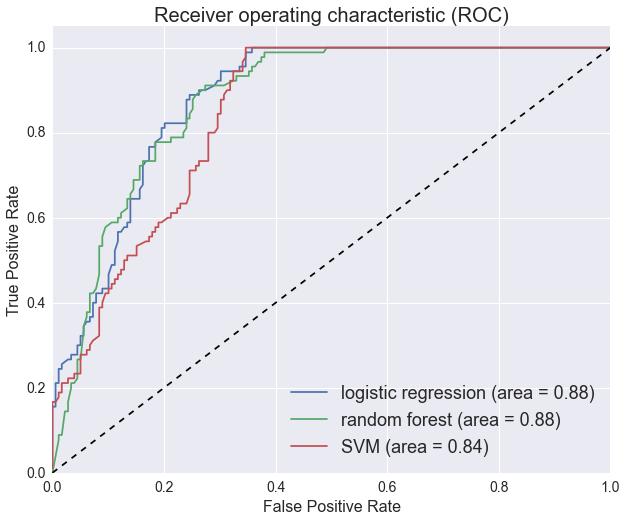

In [393]:
#split the data
train_count = int(len(eng_adj3)*0.8)
train = eng_adj3[0:train_count]
valid = eng_adj3[train_count:]

#normalize? unnecessary... relatively even

parts = []
train_act = train[train['target'] == 0]
train_chu = train[train['target'] == 1]
parts.append(train_chu)
activeL = len(train_chu)
train_act = train_act[0:activeL]
parts.append(train_act)
train = pd.concat(parts)

#drop target
target_train = train['target']
target_valid = valid['target']
keep = [u'push_registration',u'response_rate_hi',u'response_rate_low',u'swipeLeft_hi',u'swipeLeft_low',u'onlyLeft',u'retRate_hi',u'retRate_low',u'matchCount_5',u'matchCount_2',u'convoCount_2',u'convoCount_5',u'daysSinceConvo_21',u'daysSinceConvo_14',u'daysSinceConvo_7',u'daysSinceConvo_2',u'daysSinceMatch_21',u'daysSinceMatch_14',u'daysSinceMatch_7',u'daysSinceMatch_2',u'convoInitRate_hi',u'convoInitRate_low',u'matchInitRate_hi',u'matchInitRate_low',u'conversionRate_hi',u'conversionRate_low']

train = train[keep]
valid = valid[keep]

#random forest
from sklearn.ensemble import RandomForestClassifier 
fore = RandomForestClassifier(n_estimators = 100)
fore.fit(train, target_train)
forep = fore.predict(valid)
fores = fore.predict_proba(valid)
print 'Random forest classifier:'
print "%.3f" % accuracy(target_valid, forep)

# Logistic
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(train, target_train)
lrpredict = LR.predict(valid)
lrprobs = LR.predict_proba(valid)
print 'Logistic regression classifier:'
print "%.3f" % accuracy(target_valid, lrpredict)
churnProbLR = []
for i in range(len(lrpredict)):   
    churnProbLR.append(lrprobs[i][1:])
LRoutput = pd.DataFrame(zip(train.columns, np.transpose(LR.coef_)))
LRoutput = LRoutput.sort([1], ascending = 0)

#SVM
from sklearn import svm
clf = svm.LinearSVC(C=100.)
clf.fit(train, target_train)
predicted = clf.predict(valid)
SVMscores = clf.decision_function(valid)

print 'SVM classifier:'
print "%.3f" % accuracy(target_valid, predicted)

from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
roc_auc = {}

# Compute micro-average ROC curve and ROC area
#Logistic regression model
fpr['LR'], tpr['LR'], _ = roc_curve(target_valid, lrprobs[:,1])
roc_auc['LR'] = auc(fpr['LR'], tpr['LR'])
# random forest
fpr['forest'], tpr['forest'], _ = roc_curve(target_valid, fores[:,1])
roc_auc['forest'] = auc(fpr['forest'], tpr['forest'])
# SVM SVMscores
fpr['svm'], tpr['svm'], _ = roc_curve(target_valid, SVMscores)
roc_auc['svm'] = auc(fpr['svm'], tpr['svm'])

# Plot of a ROC curve for a specific class
pl.rcParams['figure.figsize'] = (10.0, 8.0)
plt.figure()
plt.plot(fpr['LR'], tpr['LR'], label='logistic regression (area = %0.2f)' % roc_auc['LR'])
plt.plot(fpr['forest'], tpr['forest'], label='random forest (area = %0.2f)' % roc_auc['forest'])
plt.plot(fpr['svm'], tpr['svm'], label='SVM (area = %0.2f)' % roc_auc['svm'])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic (ROC)', fontsize=20)
plt.legend(loc="lower right", fontsize=18)
plt.show()

In [302]:
def plotROCCurve(y_test, prediction_prob):
    fpr, tpr, thresholds = roc_curve(y_test, prediction_prob[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(bbox_to_anchor=(0.9, 0.2),
               bbox_transform=plt.gcf().transFigure)
    plt.savefig('logistic_regression_aucroc.png', bbox_inches='tight', dpi=150)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 jobs       | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed:    2.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.8s finished


mean: 0.50000, std: 0.00000, params: {'penalty': 'l1', 'C': 0.0001}
mean: 0.86753, std: 0.02212, params: {'penalty': 'l2', 'C': 0.0001}
mean: 0.50000, std: 0.00000, params: {'penalty': 'l1', 'C': 0.001}
mean: 0.86455, std: 0.02304, params: {'penalty': 'l2', 'C': 0.001}
mean: 0.83594, std: 0.01605, params: {'penalty': 'l1', 'C': 0.01}
mean: 0.86991, std: 0.02300, params: {'penalty': 'l2', 'C': 0.01}
mean: 0.85477, std: 0.01470, params: {'penalty': 'l1', 'C': 0.1}
mean: 0.88446, std: 0.02414, params: {'penalty': 'l2', 'C': 0.1}
mean: 0.89082, std: 0.02136, params: {'penalty': 'l1', 'C': 1}
mean: 0.88923, std: 0.02220, params: {'penalty': 'l2', 'C': 1}
mean: 0.88969, std: 0.02006, params: {'penalty': 'l1', 'C': 100.0}
mean: 0.88964, std: 0.02016, params: {'penalty': 'l2', 'C': 100.0}
mean: 0.88964, std: 0.02011, params: {'penalty': 'l1', 'C': 1000.0}
mean: 0.88964, std: 0.02005, params: {'penalty': 'l2', 'C': 1000.0}
mean: 0.88959, std: 0.02014, params: {'penalty': 'l1', 'C': 10000.0}
mea

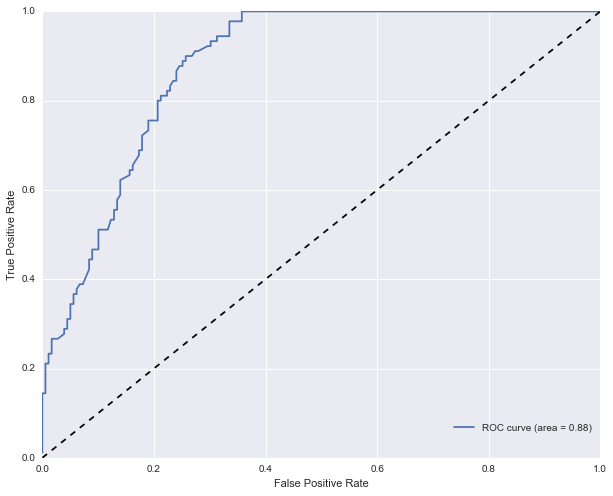

In [394]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import grid_search

C = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4]
param_grid = {'penalty':['l1', 'l2'], 'C': C}

logistic_regressions = grid_search.GridSearchCV(LogisticRegression(class_weight='auto'), cv=5, 
                                                param_grid=param_grid, scoring='roc_auc', 
                                                n_jobs=-1, verbose=1)

logistic_regressions.fit(train, target_train)
for score in logistic_regressions.grid_scores_:
    print score

print '\nOptimal Logistic Regression model:'
print logistic_regressions.best_params_
print logistic_regressions.best_score_

plotROCCurve(target_valid, logistic_regressions.predict_proba(valid))

Logistic regression classifier:
0.758


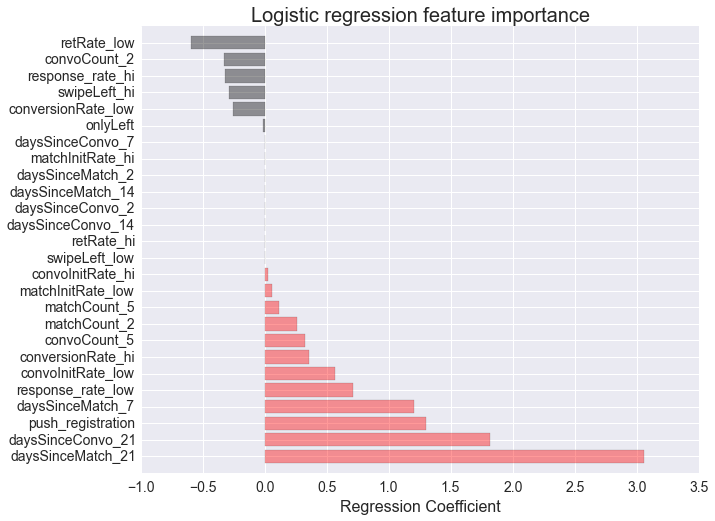

In [395]:
'''
Build the Regularized Logistic Regression Model

# BEST PARAMETERS ... {'C': 1, 'penalty': 'l1'}
'''

# Fine-tuning the logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1, penalty='l1')
lr.fit(train, target_train)
lrpredict = lr.predict(valid)
lrprobs = lr.predict_proba(valid)
print 'Logistic regression classifier:'
print "%.3f" % accuracy(target_valid, lrpredict)
churnProbLR = []
for i in range(len(lrpredict)):   
    churnProbLR.append(lrprobs[i][1:])
LRoutput = pd.DataFrame(zip(train.columns, np.transpose(lr.coef_)))
LRoutput = LRoutput.sort([1], ascending = 0)

labels = []
for item in LRoutput[0]:
    s = str(item)
    labels.append(s)
y_pos = np.arange(len(labels))
coeffic = []
positive = []
for value in LRoutput[1]:
    x = value
    coeffic.append(x)
    if x > 0: positive.append(True)
    else: positive.append(False)

d = {'coef': coeffic, 'positive': positive}
graphdf = pd.DataFrame(data=d) 

plt.barh(y_pos, graphdf.coef, color=graphdf.positive.map({True: 'r', False: 'k'}), align='center', alpha=0.4)
plt.yticks(y_pos, labels, fontsize=14)
plt.xticks(fontsize=14)
plt.ylim(-1,26)
plt.xlabel('Regression Coefficient', fontsize=16)
plt.title('Logistic regression feature importance', fontsize=20)
plt.show()

Users with push_registration are 42.13% more likely to churn
Users with response_rate_hi are 3.46% less likely to churn
Users with response_rate_low are 5.54% more likely to churn
Users with swipeLeft_hi are 0.24% more likely to churn
Users with onlyLeft are 0.68% more likely to churn
Users with retRate_low are 6.51% more likely to churn
Users with matchCount_5 are 24.04% more likely to churn
Users with matchCount_2 are 26.02% more likely to churn
Users with convoCount_2 are 23.87% more likely to churn
Users with convoCount_5 are 31.46% more likely to churn
Users with daysSinceConvo_21 are 53.14% more likely to churn
Users with daysSinceMatch_21 are 64.86% more likely to churn
Users with daysSinceMatch_7 are 51.77% more likely to churn
Users with convoInitRate_hi are 3.22% less likely to churn
Users with convoInitRate_low are 16.15% more likely to churn
Users with matchInitRate_low are 18.33% more likely to churn
Users with conversionRate_hi are 19.0% more likely to churn
Users with co

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text yticklabel objects>)

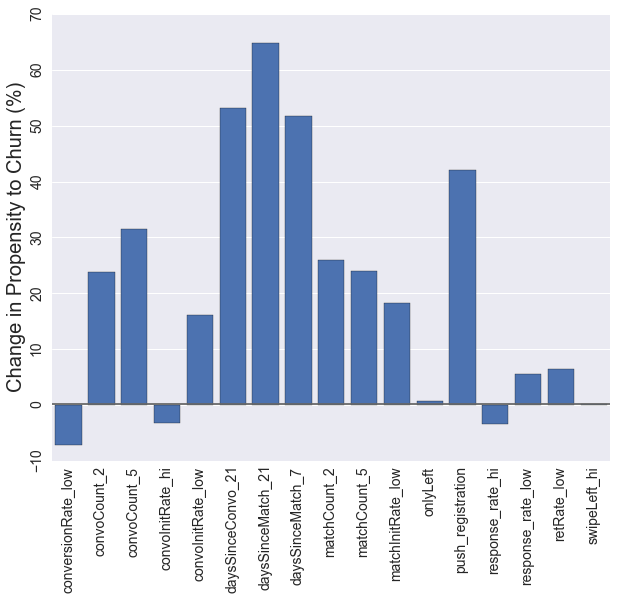

In [407]:
'''
QUANTIFICATION
'''

#atts = ['push_registration','response_rate_low','swipeLeft_hi','swipeLeft_low','onlyLeft','retRate_hi','retRate_low','conversionRate_hi','conversionRate_low','convoInitRate_hi']
atts = [u'push_registration',u'response_rate_hi',u'response_rate_low',u'swipeLeft_hi',u'onlyLeft',u'retRate_low',u'matchCount_5',u'matchCount_2',u'convoCount_2',u'convoCount_5',u'daysSinceConvo_21',u'daysSinceMatch_21',u'daysSinceMatch_7',u'convoInitRate_hi',u'convoInitRate_low',u'matchInitRate_low',u'conversionRate_hi',u'conversionRate_low']

lhDict = {}
def likeli(df, feature):
    churn_trait = float(df.groupby([feature,'target']).count()['main_match_dialog_keep_going_clicked'][1][1])
    active_trait = float(df.groupby([feature,'target']).count()['main_match_dialog_keep_going_clicked'][1][0])
    new_likelihood = round(churn_trait / (churn_trait + active_trait) * 100, 2)
    churnC = float(df.groupby([feature,'target']).count()['main_match_dialog_keep_going_clicked'][0][1])
    activeC = float(df.groupby([feature,'target']).count()['main_match_dialog_keep_going_clicked'][0][0])
    likelihood = round(churnC / (churnC + activeC) *100, 2)
    difference = new_likelihood - likelihood
    lhDict[feature] = difference
    
    if difference > 0: 
        print 'Users with ' + feature + ' are ' + str(difference * 1) + '% more likely to churn'
    else:
        print 'Users with ' + feature + ' are ' + str(difference * -1) + '% less likely to churn'
    
for col in atts:
    likeli(eng_adj3, col)

import seaborn as sns
sns.set_style("darkgrid")

#x = np.array(['high matches > convos', 'few matches > convos','less than 2 convos', 'less than 5 convos', 'often initiates convos', 'rarely initiates convos', 'more than 21 days since last convo', 'more than 21 days since last match', 'more than 7 days since last match', 'fewer than 2 matches', 'fewer than 5 matches', 'rarely initiates matches', 'only swipes left', 'deactivated push notifications','high response rate','low response rate','uses Weave infrequently','swipes left much more than right'])
x = np.array(lhDict.keys())
y = np.array(lhDict.values())
sns.barplot(x, y, hline=.1)
plt.ylabel('Change in Propensity to Churn (%)', fontsize=20)
plt.xlim(0.5,17.5)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=90)

In [396]:
'''
DOT PRODUCT
'''
predictAct = eng_adj3[eng_adj3['target'] == 0] # only look at active users (last seen > 30 days ago)
#keep = [u'main_match_dialog_keep_going_clicked',u'push_registration',u'response_rate_hi',u'response_rate_low',u'swipeLeft_hi',u'swipeLeft_low',u'onlyLeft',u'retRate_hi',u'retRate_low',u'daysSinceMatch',u'daysSinceConvo',u'convoInitRate_hi',u'convoInitRate_low',u'matchInitRate_hi',u'matchInitRate_low',u'convoCount',u'matchCount',u'conversionRate_hi',u'conversionRate_low']
#keep = [u'main_match_dialog_keep_going_clicked',u'push_registration',u'response_rate_hi',u'response_rate_low',u'swipeLeft_hi',u'swipeLeft_low',u'onlyLeft',u'retRate_hi',u'retRate_low',u'daysSinceConvo_21',u'daysSinceConvo_14',u'daysSinceConvo_7',u'daysSinceConvo_2',u'daysSinceMatch_21',u'daysSinceMatch_14',u'daysSinceMatch_7',u'daysSinceMatch_2',u'convoInitRate_hi',u'convoInitRate_low',u'matchInitRate_hi',u'matchInitRate_low',u'convoCount',u'matchCount',u'conversionRate_hi',u'conversionRate_low']
#keep = [u'push_registration',u'response_rate_hi',u'response_rate_low',u'swipeLeft_hi',u'swipeLeft_low',u'onlyLeft',u'retRate_hi',u'retRate_low',u'daysSinceConvo_21',u'daysSinceConvo_14',u'daysSinceConvo_7',u'daysSinceConvo_2',u'daysSinceMatch_21',u'daysSinceMatch_14',u'daysSinceMatch_7',u'daysSinceMatch_2',u'convoInitRate_hi',u'convoInitRate_low',u'matchInitRate_hi',u'matchInitRate_low',u'convoCount',u'matchCount',u'conversionRate_hi',u'conversionRate_low']
keep = [u'push_registration',u'response_rate_hi',u'response_rate_low',u'swipeLeft_hi',u'swipeLeft_low',u'onlyLeft',u'retRate_hi',u'retRate_low',u'matchCount_5',u'matchCount_2',u'convoCount_2',u'convoCount_5',u'daysSinceConvo_21',u'daysSinceConvo_14',u'daysSinceConvo_7',u'daysSinceConvo_2',u'daysSinceMatch_21',u'daysSinceMatch_14',u'daysSinceMatch_7',u'daysSinceMatch_2',u'convoInitRate_hi',u'convoInitRate_low',u'matchInitRate_hi',u'matchInitRate_low',u'conversionRate_hi',u'conversionRate_low']

predictAct = predictAct[keep]


# place coef values into a numpy array for processing below
coefLabels = LRoutput[0]
coefVect = []
for item in coeffic:
    coefVect.append(item[0])

popMean = predictAct.mean(axis=0)
    
userIDs = []
userTop = []
userTopString = []
userSecond = []
userSecondString = []

for i in range(len(predictAct.index)):
    '''
    objective: determine top two contributers for a users churn probability
    return user : action pairs to help direct promarketing efforts
    '''
    userVect = np.array(predictAct.iloc[i])
    d = {'labels': coefLabels, 'user': userVect, 'coefs': coefVect}
    df = pd.DataFrame(data=d)
    df['weight'] = userVect * coefVect # coef values will scale user feature values
    df = df.sort('weight', ascending=False)
    # generate new values
    userIDs.append(predictAct.index[i])
    topString = str(df['labels'].iloc[0])
    topValue = df['user'].iloc[0]
    if topString == 'push_registration':
        topCompare = 'user performed ' + topString
    elif topString == 'daysSinceConvo_21' or topString == 'daysSinceConvo_14' or topString == 'daysSinceConvo_7' or topString == 'daysSinceConvo_2':
        topCompare = 'too many days since last conversation'
    elif topString == 'daysSinceMatch_21' or topString == 'daysSinceMatch_14' or topString == 'daysSinceMatch_7' or topString == 'daysSinceMatch_2':
        topCompare = 'too many days since last match'
    elif topString == 'matchCount_2' or topString == 'matchCount_5' or topString == 'convoCount_2' or topString == 'convoCount_5':
        topCompare = 'too few interactions with other users'
    elif topString == 'response_rate_low':
        topCompare = 'user has a low response rate'
    else:
        topCompare = topString
        
    secondString = str(df['labels'].iloc[1])
    secondValue = df['user'].iloc[1]
    if secondString == 'push_registration':
        secondCompare = 'user performed ' + secondString
    elif secondString == 'daysSinceConvo_21' or secondString == 'daysSinceConvo_14' or secondString == 'daysSinceConvo_7' or secondString == 'daysSinceConvo_2':
        secondCompare = 'too many days since last conversation'
    elif secondString == 'daysSinceMatch_21' or secondString == 'daysSinceMatch_14' or secondString == 'daysSinceMatch_7' or secondString == 'daysSinceMatch_2':
        secondCompare = 'too many days since last match'
    elif secondString == 'matchCount_2' or secondString == 'matchCount_5' or secondString == 'convoCount_2' or secondString == 'convoCount_5':
        secondCompare = 'too few interactions with other users'
    elif secondString == 'response_rate_low':
        secondCompare = 'user has a low response rate'
    else:
        secondCompare = secondString
    
    userTop.append(topString)
    userTopString.append(topCompare)
    userSecond.append(secondString)
    userSecondString.append(secondCompare)

d = {'userID': userIDs, 'pred': lr_new, 'proba': out_churn, 'top': userTop, 'top string': userTopString, 'second': userSecond, 'second string': userSecondString}
output = pd.DataFrame(data=d)  
output = output.sort('proba', ascending=0)

# output predictions and probabilities to csv
output.to_csv('NYCSFpredict062615.csv', sep='\t', encoding='utf-8')
# CREATE TABLE NYCSFpredict (userID VARCHAR(20), conversion_hi VARCHAR(20), convo_init_low VARCHAR(20), deact_push VARCHAR(20), frequentUse VARCHAR(20), churn VARCHAR(20), proba VARCHAR(20));
# mysql> LOAD DATA LOCAL INFILE '/Users/kmflynn5/Documents/insight/app/NYCSFpredict062615.csv' INTO TABLE NYCSFpredict;

In [397]:
output

,pred,proba,second,second string,top,top string,userID
474,1,0.972137,daysSinceConvo_21,too many days since last conversation,daysSinceMatch_21,too many days since last match,1646939
709,1,0.956260,push_registration,user performed push_registration,daysSinceMatch_21,too many days since last match,8257198
558,1,0.940847,matchCount_2,too few interactions with other users,push_registration,user performed push_registration,2685013
779,1,0.930848,daysSinceMatch_7,too many days since last match,push_registration,user performed push_registration,10487752
706,1,0.925500,daysSinceConvo_21,too many days since last conversation,daysSinceMatch_21,too many days since last match,8020041
320,1,0.916838,push_registration,user performed push_registration,daysSinceMatch_21,too many days since last match,584644
799,1,0.899253,matchCount_2,too few interactions with other users,daysSinceMatch_7,too many days since last match,11358439
400,1,0.897343,matchCount_2,too few interactions with other users,push_registration,user performed push_registration,925300
787,1,0.890471,matchCount_2,too few interactions with other users,conversionRate_hi,conversionRate_hi,10653328
778,1,0.890471,matchCount_2,too few interactions with other users,conversionRate_hi,conversionRate_hi,10398704


In [371]:
predictAct.loc[844685]

push_registration     0
response_rate_hi      0
response_rate_low     1
swipeLeft_hi          0
swipeLeft_low         0
onlyLeft              0
retRate_hi            1
retRate_low           0
matchCount_5          0
matchCount_2          0
convoCount_2          0
convoCount_5          1
daysSinceConvo_21     1
daysSinceConvo_14     1
daysSinceConvo_7      1
daysSinceConvo_2      1
daysSinceMatch_21     1
daysSinceMatch_14     1
daysSinceMatch_7      1
daysSinceMatch_2      1
convoInitRate_hi      1
convoInitRate_low     0
matchInitRate_hi      0
matchInitRate_low     0
conversionRate_hi     0
conversionRate_low    0
Name: 844685, dtype: float64